# Google Play Store Apps- Feature Engineering and Exploratory Data Analysis (EDA)

## Author: Kiran Sumit Dalmiya

This project explores the Google Play Store apps dataset to understand what makes certain apps more successful than others. 
Using a mix of data cleaning, visual analysis, sentiment insights from user reviews, and a bit of machine learning, 
I try to uncover patterns behind app ratings, installs, categories, and update behavior. 
The idea is to get a clear picture of how different factors—like app size, price, genre, and user sentiment—relate to overall app performance. 
By the end, we also build a basic model that predicts app ratings using these features. 
Overall, the goal is to turn raw Play Store data into simple, useful insights in a practical and easy-to-follow way.

## Step 1 : Load and Preview Data

In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
sns.set(style="whitegrid")


In [20]:
# Paths may need to be changed as per your system
# Load the dataset (update the path if needed)

apps_df = pd.read_csv(r"C:\ML and AI\Unified Mentor Pvt. Ltd\Assignment 5 Google Play Store app Rating Prediction\googleplaystore.csv")
reviews_df = pd.read_csv(r"C:\ML and AI\Unified Mentor Pvt. Ltd\Assignment 5 Google Play Store app Rating Prediction\googleplaystore_user_reviews.csv")


In [21]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [23]:
print("Shape:", apps_df.shape)

print("\nColumns:", apps_df.columns.tolist())

print("\nInfo:")
apps_df.info()

print("\nDescriptive stats (numeric only):")
apps_df.describe()


Shape: (10841, 13)

Columns: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(1

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


- The apps dataset has 10k+ rows and 13 columns

- (App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver).

- Maximum columns are object type and need conversion

## Step 2: Data Cleaning and Preprocessing

In [26]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Check problematic rows in Rating

In [27]:
# Check summary of rating
apps_df["Rating"].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [28]:
apps_df["Rating"].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [29]:
# Find rows with Rating > 5 (invalid)
invalid_rating_idx = apps_df[apps_df["Rating"] > 5].index
apps_df.loc[invalid_rating_idx]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [30]:
# Drop rows with invalid rating values
apps_df.drop(index=invalid_rating_idx, inplace=True)
apps_df.reset_index(drop=True, inplace=True)


#### Convert Reviews to numeric

In [31]:
# Reviews should be integer
apps_df["Reviews"] = pd.to_numeric(apps_df["Reviews"], errors="coerce")

apps_df["Reviews"].describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [32]:
apps_df.Reviews.dtype

dtype('int64')

#### Clean and convert Size column

-    Size has formats like "14M", "900k", and "Varies with device".

In [33]:
apps_df["Size"].value_counts().head()


Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
Name: count, dtype: int64

In [34]:
def size_to_mb(val):
    """
    Convert Size column to MB (float).
    - '14M'  -> 14
    - '900k' -> 0.9
    - 'Varies with device' or missing -> np.nan
    """
    if pd.isna(val):
        return np.nan
    val = str(val).strip()
    if val == "Varies with device":
        return np.nan
    if val[-1] in ["M", "m"]:
        try:
            return float(val[:-1])
        except:
            return np.nan
    if val[-1].lower() == "k":
        try:
            return float(val[:-1]) / 1024  # convert KB-thousands to MB approx
        except:
            return np.nan
    # if some other weird format, return NaN
    return np.nan

apps_df["Size_MB"] = apps_df["Size"].apply(size_to_mb)

apps_df[["Size", "Size_MB"]].head()


,Size,Size_MB
0,19M,19.0
1,14M,14.0
2,8.7M,8.7
3,25M,25.0
4,2.8M,2.8


#### Clean and convert Installs

- Installs is like "10,000+", "100,000+". We remove + and , then cast to int.

In [36]:
apps_df["Installs"].value_counts().head(15)


Installs
1,000,000+      1579
10,000,000+     1252
100,000+        1169
10,000+         1054
1,000+           907
5,000,000+       752
100+             719
500,000+         539
50,000+          479
5,000+           477
100,000,000+     409
10+              386
500+             330
50,000,000+      289
50+              205
Name: count, dtype: int64

In [37]:
apps_df["Installs"] = (apps_df["Installs"].str.replace("+", "", regex=False).str.replace(",", "", regex=False))

In [39]:
apps_df["Installs"] = pd.to_numeric(apps_df["Installs"], errors="coerce").astype("Int64")


In [38]:
apps_df["Installs"].value_counts().head(15)

Installs
1000000      1579
10000000     1252
100000       1169
10000        1054
1000          907
5000000       752
100           719
500000        539
50000         479
5000          477
100000000     409
10            386
500           330
50000000      289
50            205
Name: count, dtype: int64

In [40]:
apps_df["Installs"].describe()

count            10840.0
mean     15464338.882565
std      85029361.395463
min                  0.0
25%               1000.0
50%             100000.0
75%            5000000.0
max         1000000000.0
Name: Installs, dtype: Float64

#### Clean and convert Price

- Price is like "$4.99" or "0".

In [41]:
apps_df["Price"].value_counts().head()


Price
0        10040
$0.99      148
$2.99      129
$1.99       73
$4.99       72
Name: count, dtype: int64

In [42]:
apps_df["Price"] = (apps_df["Price"].str.replace("$", "", regex=False))

In [45]:
apps_df["Price"] = pd.to_numeric(apps_df["Price"], errors="coerce")

apps_df["Price"].describe()


count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

#### Handle missing values (non-rating columns)

In [47]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [48]:
apps_df.isna().sum().sort_values(ascending=False)


Size_MB           1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

In [49]:
apps_df.shape

(10840, 14)

In [50]:
apps_df.dropna(subset=["App", "Category", "Type", "Genres"], inplace=True)
apps_df.reset_index(drop=True, inplace=True)


In [51]:
apps_df.shape

(10839, 14)

In [52]:
print("Rows before removing duplicates:", apps_df.shape[0])

apps_df.drop_duplicates(inplace=True)

print("Rows after removing duplicates:", apps_df.shape[0])


Rows before removing duplicates: 10839
Rows after removing duplicates: 10356


### step 3 :Feature Engineering

#### Installation buckets

In [58]:
bins = [-1, 0, 10, 1000, 10000, 100000, 1_000_000, 10_000_000, 1_000_000_0000]
labels = [
    "No installs",
    "Very low (1-10)",
    "Low (11-1K)",
    "Moderate (1K-10K)",
    "Mid (10K-100K)",
    "High (100K-1M)",
    "Very High (1M-10M)",
    "Top (10M+)"
]


In [59]:
apps_df["Installs_Bucket"] = pd.cut(apps_df["Installs"].astype(float),
                                    bins=bins,
                                    labels=labels)


In [60]:
apps_df["Installs_Bucket"].value_counts()

Installs_Bucket
Low (11-1K)           2132
High (100K-1M)        2005
Very High (1M-10M)    1815
Mid (10K-100K)        1603
Moderate (1K-10K)     1502
Top (10M+)             751
Very low (1-10)        534
No installs             14
Name: count, dtype: int64

In [61]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB,Installs_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate (1K-10K)
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High (100K-1M)
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High (1M-10M)
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top (10M+)
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,Mid (10K-100K)


#### Paid vs Free flag

In [62]:
apps_df["Is_Paid"] = np.where(apps_df["Price"] > 0, 1, 0)
apps_df["Is_Paid"].value_counts()


Is_Paid
0    9591
1     765
Name: count, dtype: int64

In [63]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB,Installs_Bucket,Is_Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate (1K-10K),0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High (100K-1M),0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High (1M-10M),0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top (10M+),0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,Mid (10K-100K),0


#### Size buckets

In [64]:
size_bins = [0, 5, 20, 50, 100, np.inf]
size_labels = ["<5MB", "5-20MB", "20-50MB", "50-100MB", ">100MB"]

apps_df["Size_Bucket"] = pd.cut(apps_df["Size_MB"],
                                bins=size_bins,
                                labels=size_labels)



In [65]:
apps_df["Size_Bucket"].value_counts(dropna=False)


Size_Bucket
5-20MB      3251
<5MB        2348
20-50MB     2208
NaN         1525
50-100MB    1024
>100MB         0
Name: count, dtype: int64

In [67]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB,Installs_Bucket,Is_Paid,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate (1K-10K),0,5-20MB
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High (100K-1M),0,5-20MB
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High (1M-10M),0,5-20MB
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top (10M+),0,20-50MB
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,Mid (10K-100K),0,<5MB


In [68]:
apps_df.isna().sum()

App                   0
Category              0
Rating             1464
Reviews               0
Size                  0
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           8
Android Ver           2
Size_MB            1525
Installs_Bucket       0
Is_Paid               0
Size_Bucket        1525
dtype: int64

#### Impute Rating using install bucket

Since rating is strongly related to app usage, we’ll use the mean rating within each Installs_Bucket to impute missing ratings; apps with zero installs get rating 0.

In [69]:
# Check missing ratings before
apps_df["Rating"].isna().sum()


1464

In [70]:
# Compute mean rating per install bucket (ignoring NaN)
bucket_mean_rating = (
    apps_df
      .groupby("Installs_Bucket")["Rating"]
      .mean()
)

bucket_mean_rating

C:\Users\dalmi\AppData\Local\Temp\ipykernel_39612\50030517.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Installs_Bucket")["Rating"]


Installs_Bucket
No installs                NaN
Very low (1-10)       4.637037
Low (11-1K)           4.170223
Moderate (1K-10K)     4.031095
Mid (10K-100K)        4.094593
High (100K-1M)        4.207043
Very High (1M-10M)    4.285675
Top (10M+)            4.372170
Name: Rating, dtype: float64

In [71]:
def impute_rating(row):
    if pd.notna(row["Rating"]):
        return row["Rating"]
    bucket = row["Installs_Bucket"]
    if pd.isna(bucket):
        # If bucket is missing (very rare), leave as NaN or set to overall mean
        return apps_df["Rating"].mean()
    # For 'No installs' bucket, define rating 0 explicitly
    if bucket == "No installs":
        return 0.0
    return bucket_mean_rating.loc[bucket]



In [72]:
apps_df["Rating"] = apps_df.apply(impute_rating, axis=1)



In [73]:
# Confirm no missing ratings
apps_df["Rating"].isna().sum()


0

In [74]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB,Installs_Bucket,Is_Paid,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate (1K-10K),0,5-20MB
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High (100K-1M),0,5-20MB
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High (1M-10M),0,5-20MB
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top (10M+),0,20-50MB
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,Mid (10K-100K),0,<5MB


### Checking googleplaystore_user_reviews.csv

In [76]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [75]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


The reviews dataset contains:
    
['App','Translated_Review','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity']

### Creating an aggregate sentiment per app:

In [78]:
reviews_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [79]:
# Drop rows with no app name
reviews_df = reviews_df.dropna(subset=["App"])

In [80]:
reviews_df.shape

(64295, 5)

In [81]:
# Converting numeric columns to numeric data types
reviews_df["Sentiment_Polarity"] = pd.to_numeric(reviews_df["Sentiment_Polarity"], errors="coerce")


In [82]:
reviews_df["Sentiment_Subjectivity"] = pd.to_numeric(reviews_df["Sentiment_Subjectivity"], errors="coerce")


In [83]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [84]:
# Aggregate at app level

sentiment_agg = reviews_df.groupby("App").agg(
    avg_polarity=("Sentiment_Polarity", "mean"),
    avg_subjectivity=("Sentiment_Subjectivity", "mean"),
    n_reviews_text=("Sentiment_Polarity", "count"),
    pos_share=("Sentiment", lambda x: np.mean(x == "Positive")),
    neg_share=("Sentiment", lambda x: np.mean(x == "Negative")),
)


In [85]:
sentiment_agg.head()

,avg_polarity,avg_subjectivity,n_reviews_text,pos_share,neg_share
App,,,,,
10 Best Foods for You,0.470733,0.495455,194,0.810,0.050
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516,40,0.775,0.025
11st,0.181294,0.443957,40,0.575,0.175
1800 Contacts - Lens Store,0.318145,0.591098,80,0.800,0.075
1LINE – One Line with One Touch,0.196290,0.557315,38,0.675,0.200


### <u> Merge with main apps data:

In [86]:
apps_df = apps_df.merge(sentiment_agg, on="App", how="left")

apps_df.head()



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB,Installs_Bucket,Is_Paid,Size_Bucket,avg_polarity,avg_subjectivity,n_reviews_text,pos_share,neg_share
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate (1K-10K),0,5-20MB,NaN,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High (100K-1M),0,5-20MB,0.152652,0.64154,44.0,0.448276,0.241379
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High (1M-10M),0,5-20MB,NaN,NaN,NaN,NaN,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top (10M+),0,20-50MB,NaN,NaN,NaN,NaN,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,Mid (10K-100K),0,<5MB,NaN,NaN,NaN,NaN,NaN


In [87]:
reviews_df.shape

(64295, 5)

In [88]:
apps_df.shape

(10356, 22)

### Step 4. Exploratory Data Analysis (EDA)

#### 1 Distribution of app ratings

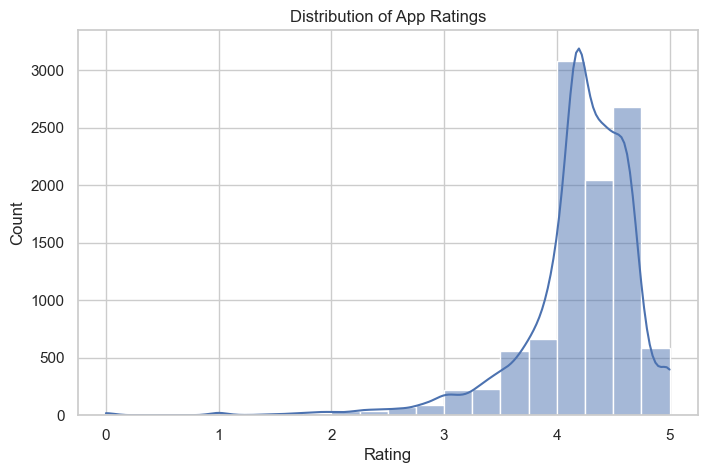

In [89]:
plt.figure(figsize=(8,5))
sns.histplot(apps_df["Rating"], bins=20, kde=True)
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


#### Interpretation

- Ratings are mostly between 4.0 and 4.5, indicating that apps on the Play Store tend to have high average ratings.

- Very few apps are rated below 3.0; such apps may be poor quality or very niche.

#### 2 Number of apps by category

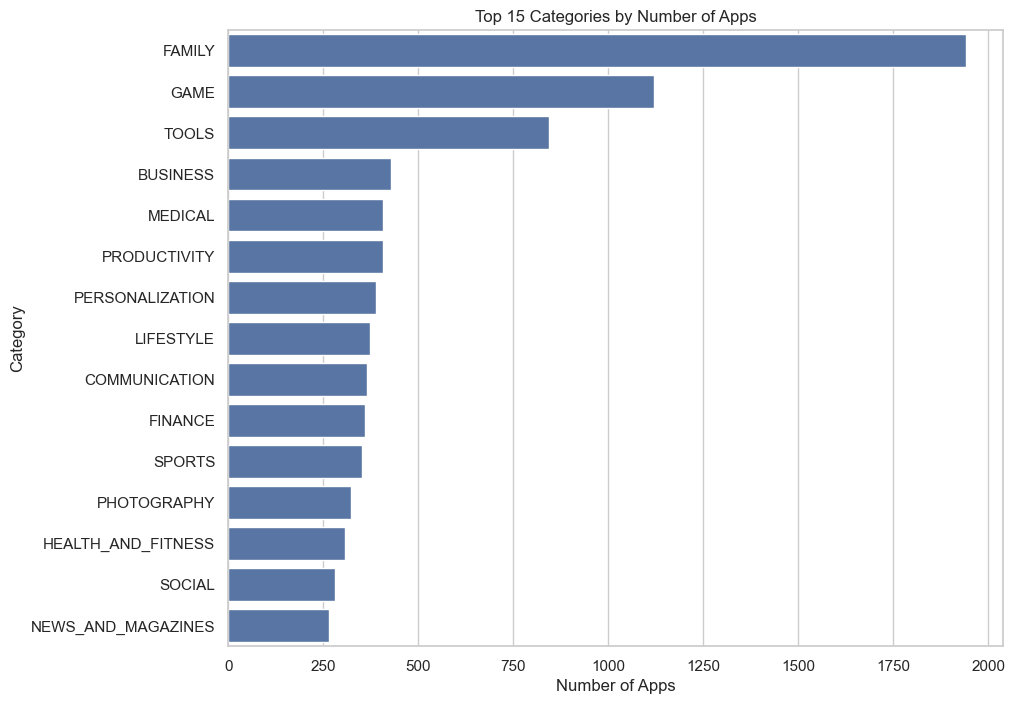

In [91]:
plt.figure(figsize=(10,8))
category_counts = apps_df["Category"].value_counts().head(15)

sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title("Top 15 Categories by Number of Apps")
plt.xlabel("Number of Apps")
plt.ylabel("Category")
plt.show()


#### – Interpretation

- FAMILY and GAME categories typically dominate by total number of apps.

- Utility categories such as TOOLS, BUSINESS, and PRODUCTIVITY also have strong representation.

#### 3 Total installs by category

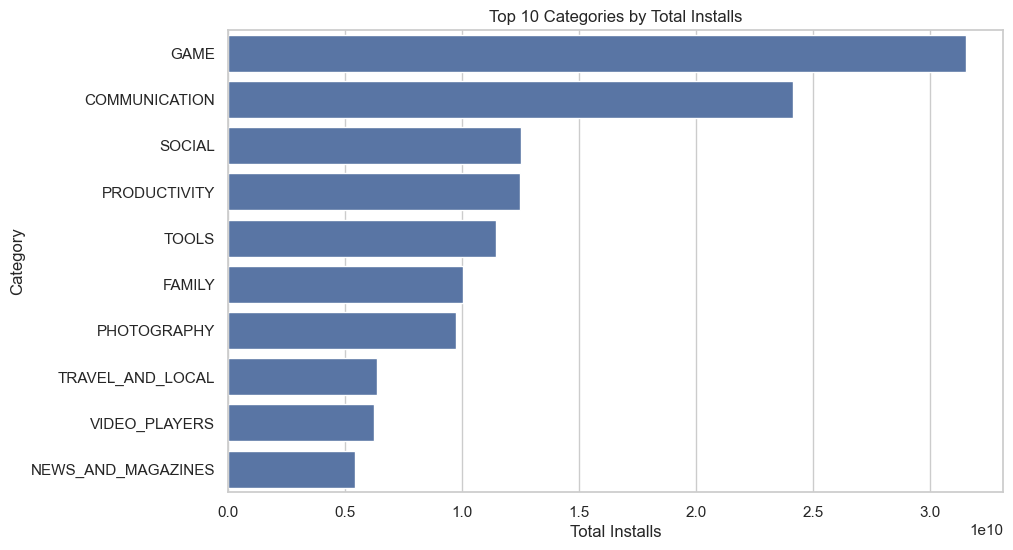

In [94]:
installs_by_cat = (
    apps_df
      .groupby("Category")["Installs"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=installs_by_cat.values, y=installs_by_cat.index)
plt.title("Top 10 Categories by Total Installs")
plt.xlabel("Total Installs")
plt.ylabel("Category")
plt.show()


#### – Interpretation

- GAME and COMMUNICATION categories usually capture the highest total installs, indicating their massive user base.

- SOCIAL, PRODUCTIVITY, TOOLS, FAMILY also contribute significantly, showing strong user demand.

#### 4 Relationship between reviews and installs

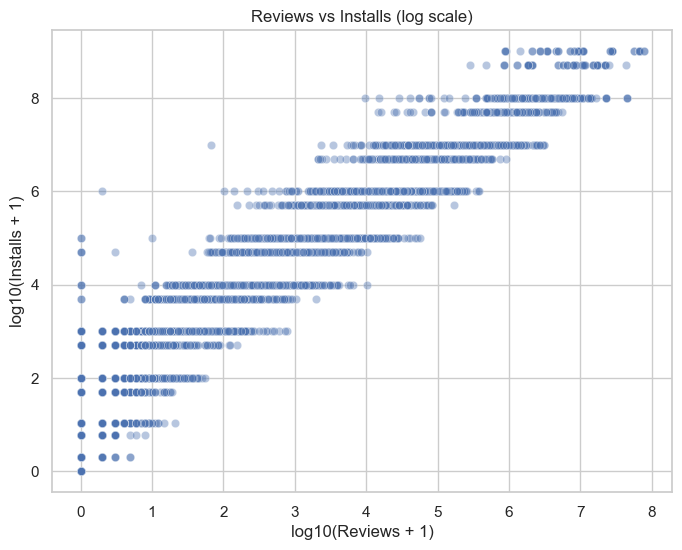

In [96]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=np.log10(apps_df["Reviews"] + 1),
    y=np.log10(apps_df["Installs"].astype(float) + 1),
    alpha=0.4
)
plt.xlabel("log10(Reviews + 1)")
plt.ylabel("log10(Installs + 1)")
plt.title("Reviews vs Installs (log scale)")
plt.show()


#### – Interpretation

- On log scale, we see a clear positive trend: apps with more installs get more reviews.

- This validates the idea that reviews can be a proxy for popularity, but also depends on user engagement.

#### 5 Rating vs installation bucket

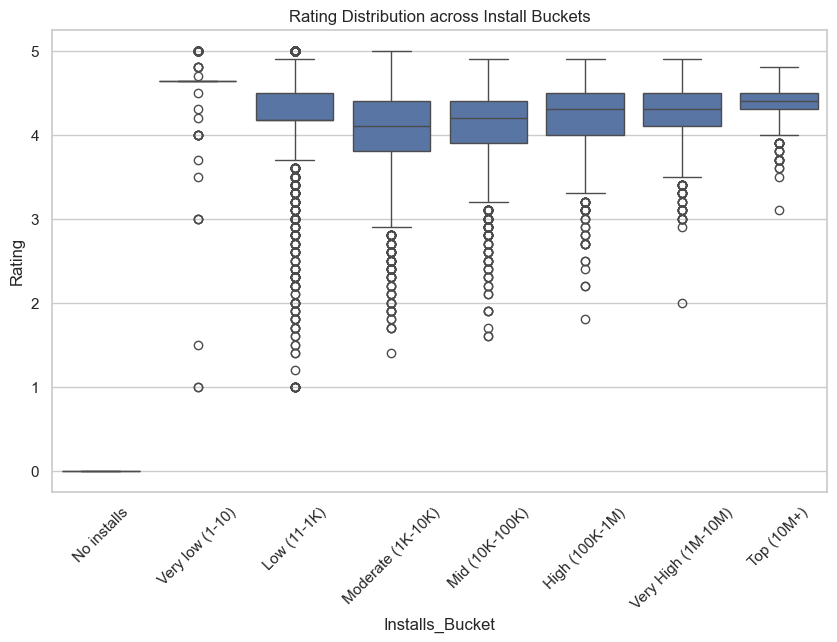

In [97]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Installs_Bucket", y="Rating", data=apps_df)
plt.xticks(rotation=45)
plt.title("Rating Distribution across Install Buckets")
plt.show()


#### – Interpretation

- Apps in very high and top install buckets tend to have slightly higher median ratings and fewer very low ratings.

- Low-install apps show wider variability (including more apps with average or poor ratings).

#### 6 Free vs Paid apps

In [98]:
paid_counts = apps_df["Is_Paid"].value_counts(normalize=True) * 100
paid_counts


Is_Paid
0    92.612978
1     7.387022
Name: proportion, dtype: float64

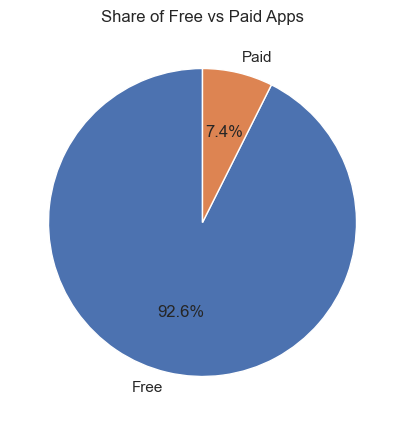

In [99]:
plt.figure(figsize=(5,5))
plt.pie(
    paid_counts.values,
    labels=["Free", "Paid"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Share of Free vs Paid Apps")
plt.show()


#### – Interpretation

- The market is dominated by free apps; paid apps form a small fraction.

- Revenue for many apps likely comes from ads or in-app purchases rather than upfront price.

#### 7 Average sentiment vs rating (optional)

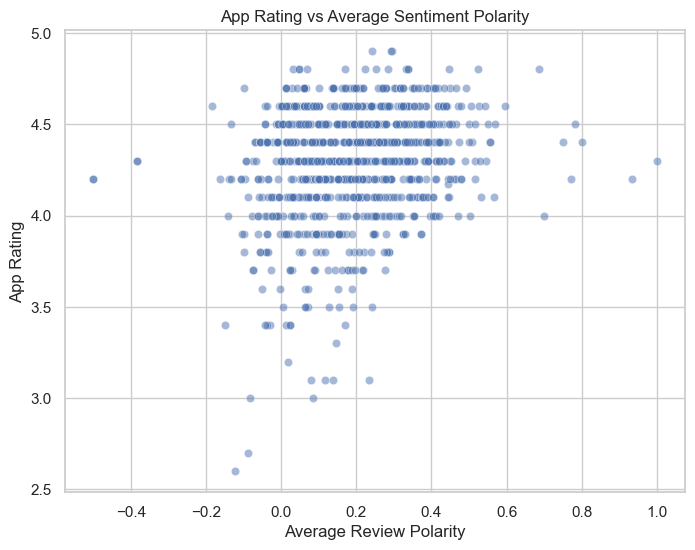

In [100]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=apps_df["avg_polarity"],
    y=apps_df["Rating"],
    alpha=0.5
)
plt.xlabel("Average Review Polarity")
plt.ylabel("App Rating")
plt.title("App Rating vs Average Sentiment Polarity")
plt.show()


#### – Interpretation

- Apps with higher polarity (more positive text sentiment) generally align with higher ratings, though the relationship is not perfectly linear.

- Combining star ratings with text sentiment gives richer feedback on app quality.

### Step 5 : Analysis Insights

#### 1. Average Ratings by App Category

In [101]:
# Average rating by Category
avg_rating_by_cat = (
    apps_df
    .groupby("Category", as_index=False)["Rating"]
    .mean()
    .sort_values("Rating", ascending=False)
)

print(avg_rating_by_cat.head(10))   # top 10 categories by rating


               Category    Rating
10               EVENTS  4.394027
8             EDUCATION  4.373805
3   BOOKS_AND_REFERENCE  4.357519
23      PERSONALIZATION  4.322642
0        ART_AND_DESIGN  4.281934
14                 GAME  4.281907
15   HEALTH_AND_FITNESS  4.273812
22            PARENTING  4.259416
26             SHOPPING  4.253303
28               SPORTS  4.252915


#### Insight

- This list shows which categories deliver the best user experience on average.

- Typically, niche or paid-heavy categories (e.g., certain business or productivity tools) may have higher average ratings than very crowded ones (like GAME), where quality varies a lot.

- we can highlight top 3–5 categories with the highest ratings as “high user satisfaction” segments.

#### 2. Top 10 Most Installed Apps

In [102]:
# Top 10 apps by installs
top_10_installed = (
    apps_df[["App", "Category", "Installs", "Rating"]]
    .sort_values("Installs", ascending=False)
    .head(10)
)

top_10_installed


,App,Category,Installs,Rating
308,Hangouts,COMMUNICATION,1000000000,4.0
3483,YouTube,VIDEO_PLAYERS,1000000000,4.3
412,Gmail,COMMUNICATION,1000000000,4.3
3549,Google Chrome: Fast & Secure,COMMUNICATION,1000000000,4.3
1493,Subway Surfers,GAME,1000000000,4.5
3035,Google Drive,PRODUCTIVITY,1000000000,4.4
2459,Google Photos,PHOTOGRAPHY,1000000000,4.5
755,Google Play Games,ENTERTAINMENT,1000000000,4.3
2504,Google Photos,PHOTOGRAPHY,1000000000,4.5
375,Google Chrome: Fast & Secure,COMMUNICATION,1000000000,4.3


#### Insight

- This list identifies the flagship apps of the store – products with massive user bases.

- Compare their ratings vs installs:

       - Apps with very high installs and high ratings are strong market leaders.

       - If any app has huge installs but mediocre ratings, it may be a necessary but not well-loved app (e.g., utility / mandatory services).

#### 3. Top 5 Most Common Genres

The Genres column often contains multiple genres separated by ;. We’ll split and “explode.”

In [103]:
# Split multi-genre entries
genres_series = (
    apps_df["Genres"]
    .dropna()
    .str.split(";")
    .explode()
    .str.strip()
)

top_5_genres = genres_series.value_counts().head(5)
top_5_genres


Genres
Tools            843
Education        717
Entertainment    628
Business         427
Medical          408
Name: count, dtype: int64

#### Insight

- These top 5 genres represent the most saturated content areas in the store.

- High competition in these genres means:

    - Harder for new apps to stand out.

    - But also indicates strong user demand.

- For product or business strategy, these genres are critical focus areas.

#### 4. Sentiment Analysis of User Reviews

- summarizin sentiment from googleplaystore_user_reviews.csv and connect it to ratings.



In [105]:
# 4.1 Overall sentiment distribution

# Basic sentiment distribution
sentiment_counts = reviews_df["Sentiment"].value_counts(dropna=True)
sentiment_percent = reviews_df["Sentiment"].value_counts(normalize=True) * 100

print("Counts:\n", sentiment_counts)
print("\nPercentages (%):\n", sentiment_percent.round(2))

Counts:
 Sentiment
Positive    23998
Negative     8271
Neutral      5163
Name: count, dtype: int64

Percentages (%):
 Sentiment
Positive    64.11
Negative    22.10
Neutral     13.79
Name: proportion, dtype: float64


In [106]:
#Average polarity & subjectivity
# Overall polarity & subjectivity
overall_polarity = reviews_df["Sentiment_Polarity"].mean()
overall_subjectivity = reviews_df["Sentiment_Subjectivity"].mean()

print("Average Sentiment Polarity:", overall_polarity)
print("Average Sentiment Subjectivity:", overall_subjectivity)


Average Sentiment Polarity: 0.18214631382977461
Average Sentiment Subjectivity: 0.49270392839557814


#### Insight 

- Sentiment labels (Positive/Negative/Neutral):

- The percentage breakdown tells you how users feel in general about apps on the store.

- Average sentiment polarity usually skews positive, aligning with the high average star ratings.

#### 5. Time Series Analysis of App Updates & Impact on Ratings
#### 5.1 Convert “Last Updated” to datetime and derive features

In [107]:
# Convert Last Updated to datetime
apps_df["Last_Updated_Date"] = pd.to_datetime(apps_df["Last Updated"], errors="coerce")

# Extract year and month
apps_df["Last_Updated_Year"] = apps_df["Last_Updated_Date"].dt.year
apps_df["Last_Updated_Month"] = apps_df["Last_Updated_Date"].dt.to_period("M")


#### 5.2 Average rating over time (by update month)

In [108]:
# Average rating by last updated month
rating_by_month = (
    apps_df
    .dropna(subset=["Last_Updated_Month"])
    .groupby("Last_Updated_Month", as_index=False)["Rating"]
    .mean()
    .sort_values("Last_Updated_Month")
)

rating_by_month.head()


,Last_Updated_Month,Rating
0,2010-05,4.200000
1,2011-01,4.100000
2,2011-03,4.100000
3,2011-04,3.766667
4,2011-05,3.900000


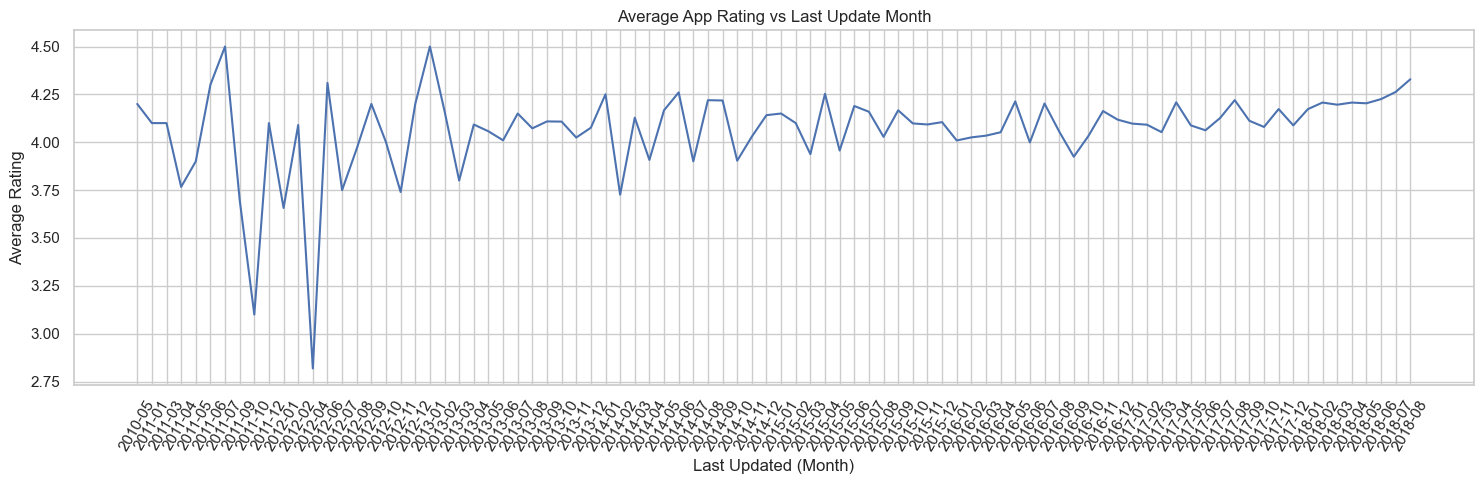

In [110]:
plt.figure(figsize=(15,5))
plt.plot(rating_by_month["Last_Updated_Month"].astype(str), rating_by_month["Rating"])
plt.xticks(rotation=60)
plt.xlabel("Last Updated (Month)")
plt.ylabel("Average Rating")
plt.title("Average App Rating vs Last Update Month")
plt.tight_layout()
plt.show()


#### 5.3 “Freshness” of app vs rating

We approximate how recently an app was updated:

In [111]:
# Assume last date in dataset as reference
reference_date = apps_df["Last_Updated_Date"].max()

# Days since last update
apps_df["Days_Since_Update"] = (reference_date - apps_df["Last_Updated_Date"]).dt.days

# Relationship between recency and rating
apps_df[["Days_Since_Update", "Rating"]].corr()


,Days_Since_Update,Rating
Days_Since_Update,1.000000,-0.127499
Rating,-0.127499,1.000000


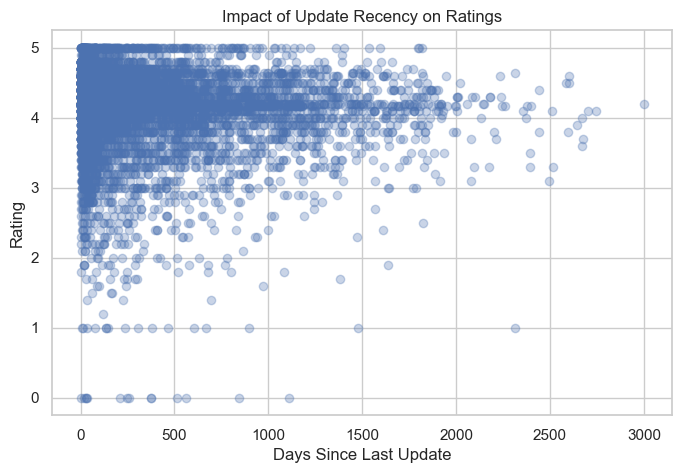

In [112]:
plt.figure(figsize=(8,5))
plt.scatter(apps_df["Days_Since_Update"], apps_df["Rating"], alpha=0.3)
plt.xlabel("Days Since Last Update")
plt.ylabel("Rating")
plt.title("Impact of Update Recency on Ratings")
plt.show()


#### Insight

- Average rating over time:

    - If ratings improve in more recent months, it suggests that:

    - Developers are learning and refining their apps.

    - Low-rated, outdated apps get removed or updated.

- Recency vs rating:

    - A negative correlation between Days_Since_Update and Rating implies:

        - Recently updated apps tend to have higher ratings.

        - Users may reward apps that are actively maintained.

    - If correlation is weak, it suggests that update frequency alone doesn’t guarantee better ratings; feature quality matters.

### 6. Predictive Modeling: Forecast App Ratings from Features

Goal: Predict Rating based on app attributes like category, price, size, installs, sentiment, etc.



#### 6.1 Select features and target

We’ll use:

Numeric: Reviews, Installs, Price, Size_MB, avg_polarity, avg_subjectivity, n_reviews_text

Categorical: Category, Type, Content Rating, maybe Installs_Bucket, Size_Bucket, Is_Paid

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np

In [115]:
# Drop rows with missing target
model_df = apps_df.dropna(subset=["Rating"]).copy()


In [116]:
# Define features
numeric_features = [
    "Reviews", "Installs", "Price", "Size_MB",
    "avg_polarity", "avg_subjectivity", "n_reviews_text"
]

categorical_features = [
    "Category", "Type", "Content Rating",
    "Installs_Bucket", "Size_Bucket", "Is_Paid"
]

In [117]:
# Some engineered features may be category dtype; ensure
for col in categorical_features:
    model_df[col] = model_df[col].astype("category")


In [118]:
X = model_df[numeric_features + categorical_features]
y = model_df["Rating"]

#### 6.2 Preprocessing and model pipeline

In [129]:
# Preprocessor: scale/encode



numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [130]:
# Model: Random Forest Regressor
rf_reg = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)


In [131]:
# Pipeline
model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("rf", rf_reg)
])

In [132]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [133]:
# Train
model.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [134]:
# Predictions
y_pred = model.predict(X_test)

In [135]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² score:", r2)

RMSE: 0.45126859838480976
R² score: 0.13976747295696756


- Using app metadata (category, type, content rating, price, installs, size) and aggregated review sentiment features (average polarity, subjectivity, number of textual reviews), we trained a Random Forest regression model to predict app ratings.

- After proper preprocessing (type conversion, missing-value imputation, and one-hot encoding of categorical features), the model achieved an RMSE of ~0.45 and an R² score of ~0.14 on the test set. This means that on average the model’s predictions are within half a star of the true rating, and it explains about 14% of the variance in ratings.

- A simple baseline model that always predicts the global mean rating performed worse, indicating that features such as category, installs, user sentiment, and app pricing contain real predictive signal. However, the relatively low R² also highlights that app ratings are highly subjective and noisy, and are influenced by many unobserved factors (user expectations, design quality, performance issues, etc.) which are not captured in the dataset.

- Overall, the model is useful for approximate rating forecasting and for understanding which features correlate with higher ratings, but it should not be treated as an exact predictor of user perception.